In [1]:
import pandas as pd
import numpy as np
from IPython.display import Markdown as md


In [2]:
np.__version__

'1.19.5'

# Pull in data (prepped in other notebook)

In [3]:
df = pd.read_csv('./data/2 OUTPUT Songs with lyrics.csv')
df

,song_id,chart_position,chart_debut,song,performer,artist_array,generic_genre,lyrics,urls
0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],ROCK,#9 Dream Lyrics[Verse 1]\nSo long ago\nWas it ...,['https://genius.com/John-lennon-9-dream-lyric...
1,'03 Bonnie & ClydeJay-Z Featuring Beyonce Knowles,4,2002-10-26,'03 Bonnie & Clyde,Jay-Z Featuring Beyonce Knowles,"['Jay-Z', 'Beyonce Knowles']",HIP_HOP,"’03 Bonnie & Clyde Lyrics[Intro: JAY-Z]\nUhh, ...",['https://genius.com/Jay-z-03-bonnie-and-clyde...
2,'65 Love AffairPaul Davis,6,1982-02-27,'65 Love Affair,Paul Davis,['Paul Davis'],ROCK,’65 Love Affair LyricsI was a car hop\nYou wer...,['https://genius.com/Paul-davis-65-love-affair...
3,('til) I Kissed YouThe Everly Brothers,4,1959-08-15,('til) I Kissed You,The Everly Brothers,['The Everly Brothers'],POP,(’Til) I Kissed You Lyrics[Verse]\nNever felt ...,['https://genius.com/The-everly-brothers-til-i...
4,(Can't Live Without Your) Love And AffectionNe...,1,1990-07-07,(Can't Live Without Your) Love And Affection,Nelson,['Nelson'],COUNTRY,(Can’t Live Without Your) Love And Affection L...,['https://genius.com/Nelson-cant-live-without-...
...,...,...,...,...,...,...,...,...,...
5018,everything i wantedBillie Eilish,8,2019-11-23,everything i wanted,Billie Eilish,['Billie Eilish'],POP,TranslationsTürkçeBillie Eilish - everything i...,['https://genius.com/Billie-eilish-everything-...
5019,iSpyKYLE Featuring Lil Yachty,4,2017-01-14,iSpy,KYLE Featuring Lil Yachty,"['KYLE', 'Lil Yachty']",POP,"I Spy, T Shirt, Isn’t She Lovely, & Swang Mash...",['https://genius.com/Alex-aiono-i-spy-t-shirt-...
5020,interludeJ. Cole,8,2021-05-22,interlude,J. Cole,['J. Cole'],HIP_HOP,"Interlude (Cole World) LyricsI'm drivin', nigg...",['https://genius.com/J-cole-interlude-cole-wor...
5021,"my.lifeJ. Cole, 21 Savage & Morray",2,2021-05-29,my.life,"J. Cole, 21 Savage & Morray","['J. Cole', '21 Savage', 'Morray']",HIP_HOP,TranslationsРусскийPortuguêsDeutschItaliano​​m...,['https://genius.com/J-cole-21-savage-and-morr...


In [4]:
len(df[['performer', 'song']].drop_duplicates())

5023

In [5]:
df[df.song.str.contains('Rolling in the Deep', case=False)].lyrics.iloc[0]

"TranslationsFrançaisEspañolPortuguêsΕλληνικάRolling in the Deep Lyrics[Verse 1]\nThere's a fire starting in my heart\nReaching a fever pitch and it's bringing me out the dark\nFinally, I can see you crystal clear\nGo ahead and sell me out and I'll lay your shit bare\nSee how I'll leave with every piece of you\nDon't underestimate the things that I will do\nThere's a fire starting in my heart\nReaching a fever pitch, and it's bringing me out the dark\n\n[Pre-Chorus]\nThe scars of your love remind me of us\nThey keep me thinkin' that we almost had it all\nThe scars of your love, they leave me breathless\nI can't help feeling\n\n[Chorus]\nWe could've had it all (You're gonna wish you never had met me)\nRolling in the deep (Tears are gonna fall, rolling in the deep)\nYou had my heart inside of your hand (You're gonna wish you never had met me)\nAnd you played it to the beat (Tears are gonna fall, rolling in the deep)\n\n[Verse 2]\nBaby, I have no story to be told\nBut I've heard one on yo

# Explode data into *one row per line*

In [6]:
lyrics_split_df = df.copy()
lyrics_split_df['Parsed Lyrics'] = df.lyrics.apply(lambda l: l.split('\n'))

every_row_is_a_line_RAW = lyrics_split_df.explode('Parsed Lyrics').drop_duplicates(
    subset=['Parsed Lyrics', 'song_id']
).drop(
    columns=['lyrics']
).rename(columns={'Parsed Lyrics': 'lyric_line'}).reset_index()


In [7]:
every_row_is_a_line_RAW

,index,song_id,chart_position,chart_debut,song,performer,artist_array,generic_genre,urls,lyric_line
0,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],ROCK,['https://genius.com/John-lennon-9-dream-lyric...,#9 Dream Lyrics[Verse 1]
1,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],ROCK,['https://genius.com/John-lennon-9-dream-lyric...,So long ago
2,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],ROCK,['https://genius.com/John-lennon-9-dream-lyric...,"Was it in a dream, was it just a dream?"
3,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],ROCK,['https://genius.com/John-lennon-9-dream-lyric...,"I know, yes I know"
4,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],ROCK,['https://genius.com/John-lennon-9-dream-lyric...,"Seemed so very real, it seemed so real to me"
...,...,...,...,...,...,...,...,...,...,...
206984,5022,pride.is.the.devilJ. Cole & Lil Baby,7,2021-05-29,pride.is.the.devil,J. Cole & Lil Baby,"['J. Cole', 'Lil Baby']",HIP_HOP,['https://genius.com/J-cole-and-lil-baby-p-r-i...,"I'm addicted to promethazine, it's crazy, yeah..."
206985,5022,pride.is.the.devilJ. Cole & Lil Baby,7,2021-05-29,pride.is.the.devil,J. Cole & Lil Baby,"['J. Cole', 'Lil Baby']",HIP_HOP,['https://genius.com/J-cole-and-lil-baby-p-r-i...,"All this money coming in, it drive me crazy no..."
206986,5022,pride.is.the.devilJ. Cole & Lil Baby,7,2021-05-29,pride.is.the.devil,J. Cole & Lil Baby,"['J. Cole', 'Lil Baby']",HIP_HOP,['https://genius.com/J-cole-and-lil-baby-p-r-i...,I'll be crazy if I blow it
206987,5022,pride.is.the.devilJ. Cole & Lil Baby,7,2021-05-29,pride.is.the.devil,J. Cole & Lil Baby,"['J. Cole', 'Lil Baby']",HIP_HOP,['https://genius.com/J-cole-and-lil-baby-p-r-i...,And it left so many R.I.P.


In [8]:
len(every_row_is_a_line_RAW[['performer', 'song']].drop_duplicates())

5023

### Filter & clean

In [9]:
# SONG_DASH_ARTIST = '[A-Z].+\s\-\s[A-Z].+'  # EG "Ariana Grande and Victoria MonÃ©t - MONOPOLY"
SONG_DASH_ARTIST = ' - '  # EG "Ariana Grande and Victoria MonÃ©t - MONOPOLY"

# regex is easiest
ENDS_WITH_YEAR_IN_PAREN = '\(\d{4}?\)$'  # eg "... (2018)"


with_filters = every_row_is_a_line_RAW[
    ~every_row_is_a_line_RAW['lyric_line'].str.contains(
        ENDS_WITH_YEAR_IN_PAREN, 
        regex= True, case=False, na=False
    )
]

with_filters = with_filters[
    ~with_filters['lyric_line'].str.contains(
        SONG_DASH_ARTIST
    )
]


# remove if starts *or* ends with "[]": ~20k
# NOTE: I checked this fairly thoroughly, this condition signals a non-lyric
with_filters = with_filters[
        ~with_filters.lyric_line.str.startswith('[') &
        ~with_filters.lyric_line.str.endswith(']')
]


# all we need, not too many verses in these songs :P 
with_filters = with_filters[
        ~with_filters.lyric_line.str.contains('Verse 1') &
        ~with_filters.lyric_line.str.contains('Verse 2') &
        ~with_filters.lyric_line.str.contains('Verse 3') &
        ~with_filters.lyric_line.str.contains('Verse One') &
        ~with_filters.lyric_line.str.contains('Verse Two') &
        ~with_filters.lyric_line.str.contains('Verse Three')
]

# TODO: 

# TODO: 
## A. "You might also like[X song]" -- drop this line entirely
## B. "[X song]You might also like" -- typically the last line of a song, so lets just drop it assuming it's already appeared elsewhere

In [10]:
# 123.lower() # so we don't accidenrtally forget this

In [11]:
len(with_filters[['performer', 'song']].drop_duplicates())

5023

In [12]:
with_more_filters = with_filters[
    ~with_filters.lyric_line.str.contains('" by ') &
    ~with_filters.lyric_line.str.contains('EmbedShare URLCopyEmbedCopy')
].reset_index()

In [13]:
len(with_more_filters[['performer', 'song']].drop_duplicates())

5023

In [14]:
MIN_CHAR_COUNT_FOR_A_LINE = 6

In [15]:
md(f'### note: we are just going to look at lyric lines of {MIN_CHAR_COUNT_FOR_A_LINE}+ characters. So lines like "yeah" will not count. (this also removes a lot of noise)')

### note: we are just going to look at lyric lines of 6+ characters. So lines like "yeah" will not count. (this also removes a lot of noise)

In [16]:
with_even_more_filters = with_more_filters[
    (with_more_filters.lyric_line.str.len() >= MIN_CHAR_COUNT_FOR_A_LINE)
]

In [17]:
len(with_even_more_filters[['performer', 'song']].drop_duplicates())

5023

# Dealing with non-lyrics returned from the API. For the prototype: just filter them out via *character length*. Long term TODO: replace them with the correct lyrics.


In [18]:
# Reasonable?
with_even_more_filters['lyric_line'].str.len().describe()

count    167628.000000
mean         35.341285
std          22.519406
min           6.000000
25%          25.000000
50%          34.000000
75%          44.000000
max        6712.000000
Name: lyric_line, dtype: float64

In [19]:
# For context:
len("We could've had it all (tears are gonna fall, rolling in the deep)")

66

<AxesSubplot:>

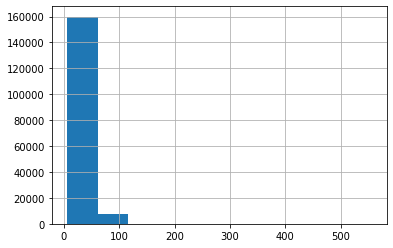

In [20]:
with_even_more_filters[
    with_even_more_filters['lyric_line'].str.len() < 600
].lyric_line.str.len().hist()

### Inspecting unusually long lyrics, they seem to be non-lyrics pretty consistently

In [21]:
LYRIC_LENGTH_CUTOFF = 380

In [22]:
with_even_more_filters[
    with_even_more_filters['lyric_line'].str.len() > LYRIC_LENGTH_CUTOFF
]#.lyric_line.str.len().describe()

,level_0,index,song_id,chart_position,chart_debut,song,performer,artist_array,generic_genre,urls,lyric_line
5316,6087,155,"Ahab, The ArabRay Stevens",5,1962-06-30,"Ahab, The Arab",Ray Stevens,['Ray Stevens'],POP,"[""https://genius.com/Ray-stevens-ahab-the-arab...",Silently through the night to the sultan's ten...
5324,6095,155,"Ahab, The ArabRay Stevens",5,1962-06-30,"Ahab, The Arab",Ray Stevens,['Ray Stevens'],POP,"[""https://genius.com/Ray-stevens-ahab-the-arab...",There she was friends lying there in all her r...
10581,12148,301,Auld Lang SyneKenny G,7,1999-12-25,Auld Lang Syne,Kenny G,['Kenny G'],JAZZ_INFLUENCED,"[""https://genius.com/Kenny-g-auld-lang-syne-th...","(In October, 1929, an over-valued stock market..."
10584,12152,301,Auld Lang SyneKenny G,7,1999-12-25,Auld Lang Syne,Kenny G,['Kenny G'],JAZZ_INFLUENCED,"[""https://genius.com/Kenny-g-auld-lang-syne-th...",(Live radio account of the fire and crash of t...
10623,12209,301,Auld Lang SyneKenny G,7,1999-12-25,Auld Lang Syne,Kenny G,['Kenny G'],JAZZ_INFLUENCED,"[""https://genius.com/Kenny-g-auld-lang-syne-th...",(His death at the hands of Jack Ruby prevented...
10627,12222,301,Auld Lang SyneKenny G,7,1999-12-25,Auld Lang Syne,Kenny G,['Kenny G'],JAZZ_INFLUENCED,"[""https://genius.com/Kenny-g-auld-lang-syne-th...",(He became President following the assassinati...
30684,35502,870,Dark HorseKaty Perry Featuring Juicy J,1,2013-10-05,Dark Horse,Katy Perry Featuring Juicy J,"['Katy Perry', 'Juicy J']",POP,"[""https://genius.com/Katy-perry-katy-perry-set...",Perry has earned her record-breaking feat cour...
117612,135294,3375,Reverend Mr. BlackThe Kingston Trio,8,1963-04-06,Reverend Mr. Black,The Kingston Trio,['The Kingston Trio'],FOLK,"[""https://genius.com/The-kingston-trio-reveren...",Reverend Mr Black LyricsHe rode easy in the sa...
117616,135298,3375,Reverend Mr. BlackThe Kingston Trio,8,1963-04-06,Reverend Mr. Black,The Kingston Trio,['The Kingston Trio'],FOLK,"[""https://genius.com/The-kingston-trio-reveren...",If ever I could have thought this man in black...
122501,140912,3510,San Franciscan NightsEric Burdon & The Animals,9,1967-08-05,San Franciscan Nights,Eric Burdon & The Animals,"['Eric Burdon', 'The Animals']",JAZZ_INFLUENCED,"[""https://genius.com/Eric-burdon-and-the-anima...",This following program is dedicated to the cit...


<AxesSubplot:>

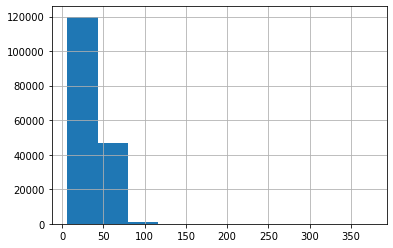

In [23]:
with_even_more_filters[
    with_even_more_filters['lyric_line'].str.len() < LYRIC_LENGTH_CUTOFF
].lyric_line.str.len().hist()

## Ok, so just filter out long lines

In [24]:
songs_that_contain_suspiciously_long_lyric_lines = with_even_more_filters[
    with_even_more_filters['lyric_line'].str.len() > LYRIC_LENGTH_CUTOFF
].song_id.unique()

In [25]:
len(songs_that_contain_suspiciously_long_lyric_lines)

7

In [26]:
songs_that_contain_suspiciously_long_lyric_lines

array(['Ahab, The ArabRay Stevens', 'Auld Lang SyneKenny G',
       'Dark HorseKaty Perry Featuring Juicy J',
       'Reverend Mr. BlackThe Kingston Trio',
       'San Franciscan NightsEric Burdon & The Animals',
       'What The World Needs Now Is Love/Abraham, Martin and JohnTom Clay',
       'WhooptyCJ'], dtype=object)

In [27]:
with_long_lyrics_removed = with_even_more_filters[
    with_even_more_filters.song_id.apply(lambda song_id: song_id not in songs_that_contain_suspiciously_long_lyric_lines)
]
with_long_lyrics_removed

,level_0,index,song_id,chart_position,chart_debut,song,performer,artist_array,generic_genre,urls,lyric_line
0,1,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],ROCK,['https://genius.com/John-lennon-9-dream-lyric...,So long ago
1,2,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],ROCK,['https://genius.com/John-lennon-9-dream-lyric...,"Was it in a dream, was it just a dream?"
2,3,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],ROCK,['https://genius.com/John-lennon-9-dream-lyric...,"I know, yes I know"
3,4,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],ROCK,['https://genius.com/John-lennon-9-dream-lyric...,"Seemed so very real, it seemed so real to me"
5,6,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],ROCK,['https://genius.com/John-lennon-9-dream-lyric...,Took a walk down the street
...,...,...,...,...,...,...,...,...,...,...,...
173807,206984,5022,pride.is.the.devilJ. Cole & Lil Baby,7,2021-05-29,pride.is.the.devil,J. Cole & Lil Baby,"['J. Cole', 'Lil Baby']",HIP_HOP,['https://genius.com/J-cole-and-lil-baby-p-r-i...,"I'm addicted to promethazine, it's crazy, yeah..."
173808,206985,5022,pride.is.the.devilJ. Cole & Lil Baby,7,2021-05-29,pride.is.the.devil,J. Cole & Lil Baby,"['J. Cole', 'Lil Baby']",HIP_HOP,['https://genius.com/J-cole-and-lil-baby-p-r-i...,"All this money coming in, it drive me crazy no..."
173809,206986,5022,pride.is.the.devilJ. Cole & Lil Baby,7,2021-05-29,pride.is.the.devil,J. Cole & Lil Baby,"['J. Cole', 'Lil Baby']",HIP_HOP,['https://genius.com/J-cole-and-lil-baby-p-r-i...,I'll be crazy if I blow it
173810,206987,5022,pride.is.the.devilJ. Cole & Lil Baby,7,2021-05-29,pride.is.the.devil,J. Cole & Lil Baby,"['J. Cole', 'Lil Baby']",HIP_HOP,['https://genius.com/J-cole-and-lil-baby-p-r-i...,And it left so many R.I.P.


In [28]:
len(with_long_lyrics_removed[['performer', 'song']].drop_duplicates())

5016

In [29]:
len(with_even_more_filters[['performer', 'song']].drop_duplicates())

5023

### (so we don't have to re-name stuff as we do updates)

In [30]:
filtering_done = with_long_lyrics_removed

# Add a numeric date column (for fast filtering), eg `1974-01-01` becomes something like `1974.0`

In [31]:
date_column_cast_to_datetime = pd.to_datetime(filtering_done['chart_debut'])
date_column_cast_to_datetime

0        1974-12-21
1        1974-12-21
2        1974-12-21
3        1974-12-21
5        1974-12-21
            ...    
173807   2021-05-29
173808   2021-05-29
173809   2021-05-29
173810   2021-05-29
173811   2021-05-29
Name: chart_debut, Length: 167366, dtype: datetime64[ns]

In [32]:
day_as_a_percentage = pd.to_numeric(date_column_cast_to_datetime.dt.dayofyear) / 366 # for leap years. it's ok to be a little sloppy


In [33]:
year_int = pd.to_datetime(filtering_done['chart_debut']).dt.strftime('%Y').astype(int)
year_int

0         1974
1         1974
2         1974
3         1974
5         1974
          ... 
173807    2021
173808    2021
173809    2021
173810    2021
173811    2021
Name: chart_debut, Length: 167366, dtype: int64

In [34]:
date_col_done = filtering_done.copy()
date_col_done['chart_debut_date_as_a_decimal'] = round(year_int + day_as_a_percentage, 2)
date_col_done

,level_0,index,song_id,chart_position,chart_debut,song,performer,artist_array,generic_genre,urls,lyric_line,chart_debut_date_as_a_decimal
0,1,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],ROCK,['https://genius.com/John-lennon-9-dream-lyric...,So long ago,1974.97
1,2,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],ROCK,['https://genius.com/John-lennon-9-dream-lyric...,"Was it in a dream, was it just a dream?",1974.97
2,3,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],ROCK,['https://genius.com/John-lennon-9-dream-lyric...,"I know, yes I know",1974.97
3,4,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],ROCK,['https://genius.com/John-lennon-9-dream-lyric...,"Seemed so very real, it seemed so real to me",1974.97
5,6,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],ROCK,['https://genius.com/John-lennon-9-dream-lyric...,Took a walk down the street,1974.97
...,...,...,...,...,...,...,...,...,...,...,...,...
173807,206984,5022,pride.is.the.devilJ. Cole & Lil Baby,7,2021-05-29,pride.is.the.devil,J. Cole & Lil Baby,"['J. Cole', 'Lil Baby']",HIP_HOP,['https://genius.com/J-cole-and-lil-baby-p-r-i...,"I'm addicted to promethazine, it's crazy, yeah...",2021.41
173808,206985,5022,pride.is.the.devilJ. Cole & Lil Baby,7,2021-05-29,pride.is.the.devil,J. Cole & Lil Baby,"['J. Cole', 'Lil Baby']",HIP_HOP,['https://genius.com/J-cole-and-lil-baby-p-r-i...,"All this money coming in, it drive me crazy no...",2021.41
173809,206986,5022,pride.is.the.devilJ. Cole & Lil Baby,7,2021-05-29,pride.is.the.devil,J. Cole & Lil Baby,"['J. Cole', 'Lil Baby']",HIP_HOP,['https://genius.com/J-cole-and-lil-baby-p-r-i...,I'll be crazy if I blow it,2021.41
173810,206987,5022,pride.is.the.devilJ. Cole & Lil Baby,7,2021-05-29,pride.is.the.devil,J. Cole & Lil Baby,"['J. Cole', 'Lil Baby']",HIP_HOP,['https://genius.com/J-cole-and-lil-baby-p-r-i...,And it left so many R.I.P.,2021.41


# CLEAN: Remove debris

### `You might also like` prefix/postfix

In [35]:
YOU_MIGHT_ALSO_LIKE = 'You might also like'
cleaned_lyrics = date_col_done.lyric_line.str.replace(YOU_MIGHT_ALSO_LIKE, '', regex=False)
cleaned_lyrics
clean_up_debris_df = date_col_done.copy()
clean_up_debris_df['lyric_line'] = cleaned_lyrics

# CHECK:
clean_up_debris_df[
    clean_up_debris_df.lyric_line.str.contains(YOU_MIGHT_ALSO_LIKE)
]

,level_0,index,song_id,chart_position,chart_debut,song,performer,artist_array,generic_genre,urls,lyric_line,chart_debut_date_as_a_decimal


# Final filters. NOTE: I'm dropping any row with *any* MISSING DATA 
Maybe we try something less aggressive later (eg blank genre is ok)

In [36]:
COLUMNS_FOR_VIZ = ['song_id', 'performer', 'song', 'generic_genre', 'lyric_line', 'chart_debut', 'chart_debut_date_as_a_decimal']

lyric_lines_ready_for_analysis = (

    clean_up_debris_df[ # latest version of data
        COLUMNS_FOR_VIZ
    ]
    .replace('', np.nan)
    .dropna(subset=['lyric_line']) # filters nothing, just here cuz in very case -- hate dealing with nulls in viz!
    .reset_index(drop=True)
)

lyric_lines_ready_for_analysis['lyric_line'] = lyric_lines_ready_for_analysis['lyric_line'].apply(
    lambda val: val.replace('â\x80\x99', "'")
).apply(
    lambda val: val.replace('Embed', "") # i checked, this works
).apply( # 2 songs using 'embed' LOL so this is necessary 
    lambda val:  val.replace('embed', "") if val.endswith('embed') else val
)


lyric_lines_ready_for_analysis

,song_id,performer,song,generic_genre,lyric_line,chart_debut,chart_debut_date_as_a_decimal
0,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,So long ago,1974-12-21,1974.97
1,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"Was it in a dream, was it just a dream?",1974-12-21,1974.97
2,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"I know, yes I know",1974-12-21,1974.97
3,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"Seemed so very real, it seemed so real to me",1974-12-21,1974.97
4,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,Took a walk down the street,1974-12-21,1974.97
...,...,...,...,...,...,...,...
167355,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"I'm addicted to promethazine, it's crazy, yeah...",2021-05-29,2021.41
167356,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"All this money coming in, it drive me crazy no...",2021-05-29,2021.41
167357,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,I'll be crazy if I blow it,2021-05-29,2021.41
167358,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,And it left so many R.I.P.,2021-05-29,2021.41


### A little taste of the cliche's we've started to uncover 🙃 

In [37]:
# bingo -- talk about a cliche!
import re
lyric_lines_ready_for_analysis[
    lyric_lines_ready_for_analysis.lyric_line.str.contains('felt this way', flags=re.IGNORECASE)
]

,song_id,performer,song,generic_genre,lyric_line,chart_debut,chart_debut_date_as_a_decimal
530,(I've Had) The Time Of My LifeBill Medley & Je...,Bill Medley & Jennifer Warnes,(I've Had) The Time Of My Life,ROCK,"No, I never felt this way before",1987-09-26,1987.73
544,(I've Had) The Time Of My LifeBill Medley & Je...,Bill Medley & Jennifer Warnes,(I've Had) The Time Of My Life,ROCK,"No, I never felt this way before (Never felt t...",1987-09-26,1987.73
23740,CherishMadonna,Madonna,Cherish,POP,"Romeo and Juliet, they never felt this way I bet",1989-08-19,1989.63
34309,Don't Look BackBoston,Boston,Don't Look Back,ROCK,It's been too long since I felt this way,1978-08-19,1978.63
34329,Don't Look BackBoston,Boston,Don't Look Back,ROCK,"Oh, It's been so long since I felt this way",1978-08-19,1978.63
36918,Drivers LicenseOlivia Rodrigo,Olivia Rodrigo,Drivers License,POP,"And I know we weren't perfect, but I've never ...",2021-01-23,2021.06
36927,Drivers LicenseOlivia Rodrigo,Olivia Rodrigo,Drivers License,POP,"And I know we weren't perfect, but I've never ...",2021-01-23,2021.06
36938,Drivers LicenseOlivia Rodrigo,Olivia Rodrigo,Drivers License,POP,"I know we weren't perfect, but I've never felt...",2021-01-23,2021.06
40742,Fallin'Alicia Keys,Alicia Keys,Fallin',POP,"Oh, oh, I never felt this way",2001-06-16,2001.46
55646,Hey There DelilahPlain White T's,Plain White T's,Hey There Delilah,POP,We know that none of them have felt this way,2007-04-14,2007.28


### Lyric lines by year (sanity check)

In [38]:
lyric_lines_ready_for_analysis

,song_id,performer,song,generic_genre,lyric_line,chart_debut,chart_debut_date_as_a_decimal
0,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,So long ago,1974-12-21,1974.97
1,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"Was it in a dream, was it just a dream?",1974-12-21,1974.97
2,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"I know, yes I know",1974-12-21,1974.97
3,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"Seemed so very real, it seemed so real to me",1974-12-21,1974.97
4,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,Took a walk down the street,1974-12-21,1974.97
...,...,...,...,...,...,...,...
167355,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"I'm addicted to promethazine, it's crazy, yeah...",2021-05-29,2021.41
167356,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"All this money coming in, it drive me crazy no...",2021-05-29,2021.41
167357,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,I'll be crazy if I blow it,2021-05-29,2021.41
167358,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,And it left so many R.I.P.,2021-05-29,2021.41


<AxesSubplot:>

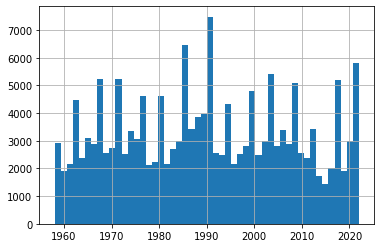

In [39]:
lyric_lines_ready_for_analysis.chart_debut.apply(lambda d: int(d[:4])).hist(bins=50)

In [44]:
num_unique_songs_left_after_filters = len(lyric_lines_ready_for_analysis[['performer', 'song']].drop_duplicates())

md(f'## After all temporary filers, we have lyrics from {num_unique_songs_left_after_filters}/~5100 original songs')


## After all temporary filers, we have lyrics from 5016/~5100 original songs

# TEMP: figure out what songs are getting dropped

In [41]:
a = set(every_row_is_a_line_RAW.song_id.unique())
b = set(lyric_lines_ready_for_analysis.song_id.unique())
list(a.difference(b))

['What The World Needs Now Is Love/Abraham, Martin and JohnTom Clay',
 'Dark HorseKaty Perry Featuring Juicy J',
 'Auld Lang SyneKenny G',
 'WhooptyCJ',
 'San Franciscan NightsEric Burdon & The Animals',
 'Ahab, The ArabRay Stevens',
 'Reverend Mr. BlackThe Kingston Trio']

# Export

In [42]:
lyric_lines_ready_for_analysis.to_csv('./data/3 OUTPUT One lyric lines per row, cleaned.csv', index=False)